In [4]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline 

In [5]:
import zipfile

In [6]:
dataset_path="/content/drive/My Drive/archive.zip"
zfile=zipfile.ZipFile(dataset_path)
zfile.extractall()

In [7]:
from keras.preprocessing.image import ImageDataGenerator
trd = ImageDataGenerator(rescale=1./255)
train_data = trd.flow_from_directory(directory="train",target_size=(224,224))
tsd = ImageDataGenerator(rescale=1./255)
test_data = tsd.flow_from_directory(directory="test", target_size=(224,224))
vd = ImageDataGenerator(rescale=1./255)
valid_data = vd.flow_from_directory(directory="valid", target_size=(224,224))

Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [8]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights=None))
model.add(Dense(200, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:

train_model = model.fit(train_data,
                  batch_size=32,
                  epochs=50,
                  verbose=1,
                  validation_data=valid_data)

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

In [ ]:
score = model.evaluate(valid_data, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [10]:
from tensorflow.keras.models import load_model 

In [ ]:
model.save('my_model.h5') 

In [12]:
from tensorflow.keras.utils import Sequence
loaded_model = load_model('/content/drive/My Drive/my_model.h5') 
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
Total params: 23,997,512
Trainable params: 23,944,392
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
score = loaded_model.evaluate(valid_data, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.703869640827179
Validation accuracy: 0.8519999980926514


In [17]:
score = loaded_model.evaluate(train_data, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

Validation loss: 0.1898832768201828
Validation accuracy: 0.99287348985672


In [20]:
model1 = Sequential()
model1.add(ResNet50(include_top=False, pooling='max', weights=None))
model1.add(Dense(200, activation='softmax'))

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.SGD(
    learning_rate=0.001, name="SGD")

In [23]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
Total params: 23,997,512
Trainable params: 23,944,392
Non-trainable params: 53,120
_________________________________________________________________


In [26]:
train_model1 = model.fit(train_data,
                  batch_size=64,
                  epochs=40,
                  verbose=1,
                  validation_data=valid_data)

Epoch 1/40
860/860 [==============================] - 158s 184ms/step - loss: 7.0645 - accuracy: 0.0099 - val_loss: 7.4063 - val_accuracy: 0.0100
Epoch 2/40
860/860 [==============================] - 158s 183ms/step - loss: 5.6735 - accuracy: 0.0231 - val_loss: 5.4588 - val_accuracy: 0.0330
Epoch 3/40
860/860 [==============================] - 158s 183ms/step - loss: 5.0555 - accuracy: 0.0489 - val_loss: 5.2188 - val_accuracy: 0.0530
Epoch 4/40
860/860 [==============================] - 158s 183ms/step - loss: 4.6054 - accuracy: 0.0855 - val_loss: 4.4331 - val_accuracy: 0.1320
Epoch 5/40
860/860 [==============================] - 157s 183ms/step - loss: 4.2351 - accuracy: 0.1285 - val_loss: 4.1672 - val_accuracy: 0.1410
Epoch 6/40
860/860 [==============================] - 158s 183ms/step - loss: 3.8989 - accuracy: 0.1746 - val_loss: 3.6398 - val_accuracy: 0.2080
Epoch 7/40
860/860 [==============================] - 158s 183ms/step - loss: 3.5653 - accuracy: 0.2312 - val_loss: 3.4164 -

In [28]:
train_model1 = model.fit(train_data,
                  batch_size=64,
                  epochs=20,
                  verbose=1,
                  validation_data=valid_data)

Epoch 1/20
860/860 [==============================] - 157s 183ms/step - loss: 0.0961 - accuracy: 0.9918 - val_loss: 1.4015 - val_accuracy: 0.6680
Epoch 2/20
860/860 [==============================] - 157s 183ms/step - loss: 0.0935 - accuracy: 0.9929 - val_loss: 1.3981 - val_accuracy: 0.6720
Epoch 3/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0880 - accuracy: 0.9927 - val_loss: 1.4412 - val_accuracy: 0.6550
Epoch 4/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0894 - accuracy: 0.9912 - val_loss: 1.4183 - val_accuracy: 0.6650
Epoch 5/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0818 - accuracy: 0.9932 - val_loss: 1.4076 - val_accuracy: 0.6700
Epoch 6/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0786 - accuracy: 0.9931 - val_loss: 1.3988 - val_accuracy: 0.6770
Epoch 7/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0738 - accuracy: 0.9946 - val_loss: 1.3942 -

In [29]:
train_model1 = model.fit(train_data,
                  batch_size=64,
                  epochs=20,
                  verbose=1,
                  validation_data=valid_data)

Epoch 1/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0387 - accuracy: 0.9975 - val_loss: 1.3445 - val_accuracy: 0.6880
Epoch 2/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0366 - accuracy: 0.9975 - val_loss: 1.3590 - val_accuracy: 0.6880
Epoch 3/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0389 - accuracy: 0.9968 - val_loss: 1.3796 - val_accuracy: 0.6870
Epoch 4/20
860/860 [==============================] - 158s 184ms/step - loss: 0.0352 - accuracy: 0.9976 - val_loss: 1.3736 - val_accuracy: 0.6850
Epoch 5/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0368 - accuracy: 0.9973 - val_loss: 1.3488 - val_accuracy: 0.6870
Epoch 6/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0347 - accuracy: 0.9980 - val_loss: 1.3385 - val_accuracy: 0.6910
Epoch 7/20
860/860 [==============================] - 158s 183ms/step - loss: 0.0324 - accuracy: 0.9980 - val_loss: 1.3099 -

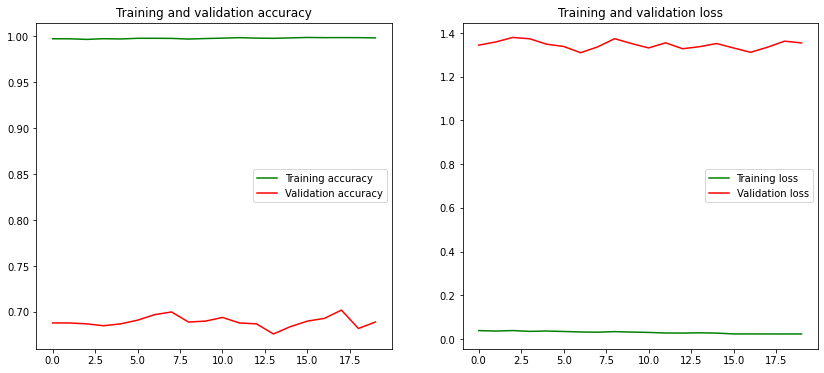

In [30]:
def plot_accuracy_and_loss(train_model1):
    hist = train_model1.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model1)

In [3]:
score = model.evaluate(train_data, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

NameError: ignored

In [2]:
model1.save('my_model1.h5') 

NameError: ignored